In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dfdir = f"/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/DiffusionReasoning/CCN_abstract_figures/source"

In [38]:
from os.path import join
df = pd.read_excel(join(dfdir,'final_tab_for_plot.xlsx'), index_col=0)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [39]:
from os.path import join
df = pd.read_csv(join(dfdir,'final_tab_for_plot.csv'), index_col=0)

In [40]:
df.dropna(how='all', inplace=True)

In [41]:
df

,final_epoch,model_orig,model,valid,C3,C2,row_mem_ratio,panel_mem_ratio,Encoding,Conditional,expname
0.0,1005000.0,DiT_S_1,DiT-S/1,0.739,0.551,0.159,0.0,0.320,digit,×,045-RAVEN10_abstract-uncond-DiT_S_1_20240311-1256
1.0,1029000.0,DiT_B_1,DiT-B/1,0.683,0.436,0.198,0.0,0.325,digit,×,048-RAVEN10_abstract-uncond-DiT_B_1_20240311-1259
4.0,1092000.0,DiT_S_3,DiT-S/3,0.659,0.334,0.220,0.0,0.331,digit,×,053-RAVEN10_abstract-uncond-DiT_S_3_20240312-0231
5.0,1092000.0,DiT_B_3,DiT-B/3,0.643,0.241,0.258,0.0,0.345,digit,×,055-RAVEN10_abstract-uncond-DiT_B_3_20240312-0233
0.0,999000.0,BaseBlnrX3,EDMx1,0.645,0.232,0.257,0.0,0.329,digit,×,BaseBlnrX3_new_RAVEN10_abstract_20240313-1736
5.0,999000.0,WideBlnrX3,EDMx2,0.706,0.415,0.230,0.0,0.343,digit,×,WideBlnrX3_new_RAVEN10_abstract_20240412-1347
8.0,999000.0,WideBlnrX3_noattr,EDMx2*,0.696,0.402,0.231,0.0,0.337,digit,×,WideBlnrX3_new_noattn_RAVEN10_abstract_2024041...
11.0,999000.0,BigBlnrX3,EDMx3,0.702,0.410,0.236,0.0,0.345,digit,×,BigBlnrX3_new_RAVEN10_abstract_20240412-0143


In [30]:
import sys
sys.path.append("/Users/binxuwang/Github/DiffusionReasoning")
from stats_plot_utils import saveallforms

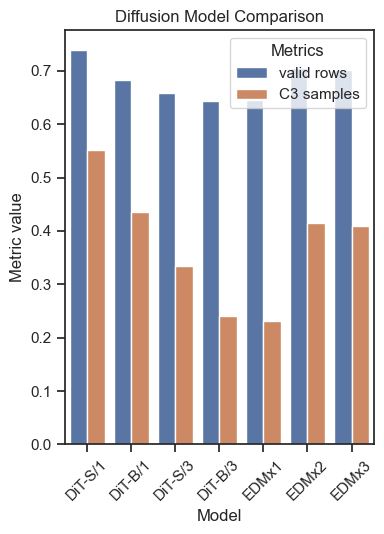

In [55]:
# Setting the style and palette for the plots
# nogrid
# sns.set_style("ticks")
# sns.set_palette('Set2
# Creating the plot data frame
plot_data = df[['model', 'valid', 'C3', ]]#'''r2_ratio'
# remove the row with "EDMx2*" model
plot_data = plot_data[plot_data['model'] != 'EDMx2*']
# rename column names valid -> valid row, C3 -> C3 sample
plot_data.columns = ['model', 'valid rows', 'C3 samples']
# Melting the data to long format suitable for sns.barplot
plot_data_melted = plot_data.melt(id_vars=['model'], var_name='Metric', value_name='Value')
# Creating the bar plot
plt.figure(figsize=(4, 5.5))
bar_plot = sns.barplot(x='model', y='Value', hue='Metric', data=plot_data_melted)
plt.title('Diffusion Model Comparison')
plt.xlabel('Model')
plt.ylabel('Metric value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
# Show the plot
plt.tight_layout()
saveallforms(dfdir, 'model_comparison_barplot')
plt.show()

### Autoregressive model synopsis

In [37]:
import os
from os.path import join
from circuit_toolkit import saveallforms

In [42]:
tabdir = "/n/home12/binxuwang/Github/DiffusionReasoning/Tables"

syndf_GPT = pd.read_csv(join(tabdir, "GPT2_raven_tensorboard_data.csv"), index_col=0)
syndf_SSM = pd.read_csv(join(tabdir, "SSM_raven_tensorboard_data.csv"), index_col=0)
syndf_EDM = pd.read_csv(join(tabdir, "EDM_raven_tensorboard_data.csv"), index_col=0)
syndf_DiT = pd.read_csv(join(tabdir, "DiT_raven_tensorboard_data.csv"), index_col=0)

In [38]:

figroot = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning"
fig_syndir = join(figroot, f"Figure_model_synopsis",)
os.makedirs(fig_syndir, exist_ok=True)

In [6]:
syndf_SSM

,Loss/train,Train/Avg_Loss,Val/AnyValid,Val/AnyValid_abinit,Val/Avg_Loss,Val/C2,Val/C2_abinit,Val/C3,Val/C3_abinit,lr,full_name,step,step/epoch
run_name,,,,,,,,,,,,,
mamba_huge_uncond_all,0.227859,0.231787,0.922500,0.596680,24.653305,0.3005,0.236816,0.6995,0.225586,0.000003,mamba_huge_RAVEN_uncond_all-20240730-004038/te...,239414,95
mamba_big_uncond_heldout0,0.254182,0.225767,0.889000,0.537272,26.397144,0.4885,0.171387,0.5115,0.174805,0.000000,mamba_big_RAVEN_uncond_heldout0-20240726-15330...,216099,99
mamba_big_uncond_all,0.227219,0.231080,0.911667,0.554688,26.789389,0.3585,0.179688,0.6415,0.213379,0.000000,mamba_big_RAVEN_uncond_all-20240730-003500/ten...,246899,99
Mamba_base_uncond_heldout0,0.279168,0.276806,0.866500,0.418294,44.025986,0.6140,0.100586,0.3860,0.040527,0.000000,Mamba_base_RAVEN_uncond_heldout0-20240726-0047...,216099,99
mamba_medium_uncond_all,0.233620,0.235761,0.895667,0.513509,32.534550,0.4280,0.152832,0.5720,0.125977,0.000000,mamba_medium_RAVEN_uncond_all-20240729-022153/...,246899,99
mamba_medium_uncond_heldout0,0.249798,0.229807,0.879167,0.482910,33.249817,0.5525,0.122559,0.4475,0.110840,0.000000,mamba_medium_RAVEN_uncond_heldout0-20240726-15...,216099,99


In [7]:
syndf_GPT

,Loss/train,Train/Avg_Loss,Val/AnyValid,Val/AnyValid_abinit,Val/Avg_Loss,Val/C2,Val/C2_abinit,Val/C3,Val/C3_abinit,lr,full_name,step,step/epoch
run_name,,,,,,,,,,,,,
GPT2_medium_uncond_heldout0_stream16M,3.196153,3.244510,0.962333,0.375000,3.288064,0.2110,0.138500,0.7890,0.040500,0.0,GPT2_medium_RAVEN_uncond_heldout0_stream16M-20...,250000,249999
GPT2_medium_cond_all,0.475036,0.482606,0.960500,0.684833,13.489779,0.1380,0.326500,0.8620,0.333000,0.0,GPT2_medium_RAVEN_cond_all-20240702-032839/ten...,246899,99
GPT2_base_uncond_heldout0,1.238913,1.439255,0.911000,0.486003,9.440474,0.3700,0.145996,0.6300,0.178223,0.0,GPT2_base_RAVEN_uncond_heldout0-20240630-02394...,216099,99
GPT2_medium_uncond_all_stream16M,3.208654,3.200251,0.977000,0.379333,3.139211,0.0895,0.162500,0.9105,0.038500,0.0,GPT2_medium_RAVEN_uncond_all_stream16M-2024070...,250000,249999
GPT2_medium_cond_heldout0,0.425383,0.427759,0.929333,0.634500,14.729448,0.2615,0.288000,0.7385,0.299000,0.0,GPT2_medium_RAVEN_cond_heldout0-20240701-23135...,216099,99
GPT2_base_cond_heldout0,1.239679,1.258030,0.935333,0.595333,9.661391,0.2305,0.272500,0.7695,0.251500,0.0,GPT2_base_RAVEN_cond_heldout0-20240701-225339/...,216099,99
GPT2_medium_cond_all_stream16M,2.841955,3.115757,0.976333,0.388000,3.071602,0.0845,0.211000,0.9155,0.063000,0.0,GPT2_medium_RAVEN_cond_all_stream16M-20240704-...,250000,249999
GPT2_medium_uncond_all,0.638258,0.631115,0.931333,0.502930,13.334393,0.2565,0.174316,0.7435,0.196777,0.0,GPT2_medium_RAVEN_uncond_all-20240702-032428/t...,246899,99
GPT2CmbEmb_base_uncond_heldout0,1.481050,1.551615,0.909167,0.435710,9.333219,0.3810,0.129883,0.6190,0.131836,0.0,GPT2CmbEmb_base_RAVEN_uncond_heldout0-20240701...,216099,99


In [8]:
df = pd.concat([syndf_GPT, syndf_SSM], axis=0)

In [11]:
df.index

Index(['GPT2_medium_uncond_heldout0_stream16M', 'GPT2_medium_cond_all',
       'GPT2_base_uncond_heldout0', 'GPT2_medium_uncond_all_stream16M',
       'GPT2_medium_cond_heldout0', 'GPT2_base_cond_heldout0',
       'GPT2_medium_cond_all_stream16M', 'GPT2_medium_uncond_all',
       'GPT2CmbEmb_base_uncond_heldout0', 'GPT2_medium_uncond_heldout0',
       'mamba_huge_uncond_all', 'mamba_big_uncond_heldout0',
       'mamba_big_uncond_all', 'Mamba_base_uncond_heldout0',
       'mamba_medium_uncond_all', 'mamba_medium_uncond_heldout0'],
      dtype='object', name='run_name')

In [30]:
df["conditional"] = df.index.map(lambda x: not "uncond" in x)
df["heldout"] = df.index.map(lambda x: "heldout0" in x)
df["streaming"] = df.index.map(lambda x: "stream" in x)
df["model"] = df.index.map(lambda x: x.replace("_heldout0", "").replace("_uncond",""))#"_".join(x.split("_")[:]))
df_plot = df[df["heldout"] & ~df["conditional"] & ~df["streaming"]]


In [32]:
# plot_data = df_plot[['model', 'Val/AnyValid_abinit', 'Val/C3_abinit', ]]#'''r2_ratio'
plot_data

,model,valid rows,C3 samples
run_name,,,
GPT2_base_uncond_heldout0,GPT2_base,0.486003,0.178223
GPT2CmbEmb_base_uncond_heldout0,GPT2CmbEmb_base,0.435710,0.131836
GPT2_medium_uncond_heldout0,GPT2_medium,0.504232,0.190430
mamba_big_uncond_heldout0,mamba_big,0.537272,0.174805
Mamba_base_uncond_heldout0,Mamba_base,0.418294,0.040527
mamba_medium_uncond_heldout0,mamba_medium,0.482910,0.110840


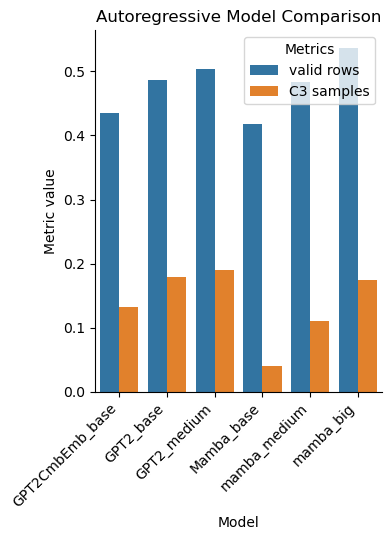

In [39]:
plot_data = df_plot[['model', 'Val/AnyValid_abinit', 'Val/C3_abinit', ]]#'''r2_ratio'
# remove the row with "EDMx2*" model
plot_data = plot_data[plot_data['model'] != 'EDMx2*']
# rename column names valid -> valid row, C3 -> C3 sample
plot_data.columns = ['model', 'valid rows', 'C3 samples']
# Melting the data to long format suitable for sns.barplot
plot_data_melted = plot_data.melt(id_vars=['model'], var_name='Metric', value_name='Value')
# Creating the bar plot
plt.figure(figsize=(4, 5.5))
bar_plot = sns.barplot(x='model', y='Value', hue='Metric', data=plot_data_melted, 
                       order=["GPT2CmbEmb_base", "GPT2_base", "GPT2_medium", "Mamba_base", "mamba_medium", "mamba_big"])
plt.title('Autoregressive Model Comparison')
plt.xlabel('Model')
plt.ylabel('Metric value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
# Show the plot
plt.tight_layout()
saveallforms(fig_syndir, 'autoreg_model_comparison_barplot')
plt.show()

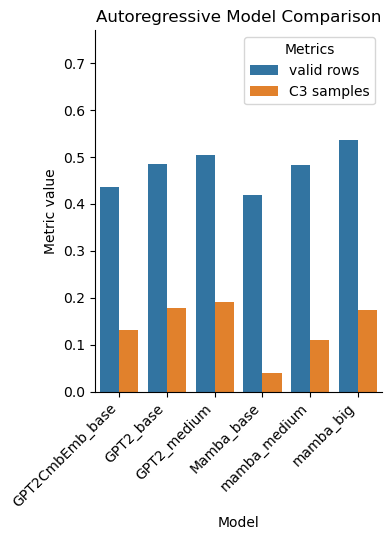

In [86]:
plot_data = df_plot[['model', 'Val/AnyValid_abinit', 'Val/C3_abinit', ]]#'''r2_ratio'
# remove the row with "EDMx2*" model
plot_data = plot_data[plot_data['model'] != 'EDMx2*']
# rename column names valid -> valid row, C3 -> C3 sample
plot_data.columns = ['model', 'valid rows', 'C3 samples']
# Melting the data to long format suitable for sns.barplot
plot_data_melted = plot_data.melt(id_vars=['model'], var_name='Metric', value_name='Value')
# Creating the bar plot
plt.figure(figsize=(4, 5.5))
bar_plot = sns.barplot(x='model', y='Value', hue='Metric', data=plot_data_melted, 
                       order=["GPT2CmbEmb_base", "GPT2_base", "GPT2_medium", "Mamba_base", "mamba_medium", "mamba_big"])
plt.title('Autoregressive Model Comparison')
plt.xlabel('Model')
plt.ylabel('Metric value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
# Show the plot
plt.tight_layout()
plt.ylim(0.0, 0.77)
saveallforms(fig_syndir, 'autoreg_model_comparison_barplot_ylim')
plt.show()

### Accuracy vs Dataset scale

In [48]:
import re
def extract_and_convert(string):
    # Pattern to match the "0_16" part and convert to float 0.16
    match1 = re.search(r'stream(\d+)_(\d+)', string)
    if match1:
        num1 = int(match1.group(1))
        num2 = int(match1.group(2))
        result = float(f"{num1}.{num2}")
        return result
    
    # Pattern to match the "16M" part and convert to integer 16
    match2 = re.search(r'stream(\d+)M', string)
    if match2:
        result = int(match2.group(1))
        return result
    
    return None

In [61]:
syndf_EDM["model"] = syndf_EDM.index.map(lambda x: x.split("_")[0])#"_".join())
syndf_DiT["model"] = syndf_DiT.index.map(lambda x: x.split("-")[2])#"_".join())
df_diff = pd.concat([syndf_EDM, syndf_DiT], axis=0)

In [70]:
df_diff["conditional"] = df_diff.index.map(lambda x: False)#(lambda x: not "uncond" in x)
df_diff["heldout"] = df_diff.index.map(lambda x: "heldout0" in x)
df_diff["scale"] = df_diff.index.map(extract_and_convert)
df_diff["model_class"] = df_diff["model"].map(lambda x: "DiT" if "DiT" in x else "EDM")#"_".join())
df_diff[df_diff["heldout"] & (df_diff["scale"]==16)]

,Learning Rate,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,full_name,step,step/epoch,model,Speed/steps_per_sec,conditional,heldout,scale,model_class
run_name,,,,,,,,,,,,,,,,,,
WideBlnrX3_new_stream16M_heldout0,0.0002,0.647776,0.636138,0.729492,4482.0,0.162109,332.0,0.538574,1103.0,WideBlnrX3_new_stream16M_heldout0_RAVEN10_abst...,999999,999999,WideBlnrX3,NaN,False,True,16.0,EDM
BigBlnrX3_new_stream16M_heldout0,0.0002,0.637376,0.592674,0.713216,4382.0,0.127441,261.0,0.561035,1149.0,BigBlnrX3_new_stream16M_heldout0_RAVEN10_abstr...,999999,999999,BigBlnrX3,NaN,False,True,16.0,EDM
095-uncond-DiT_B_1-stream16M_heldout0,NaN,0.096062,0.096317,0.756348,4647.0,0.141113,289.0,0.594727,1218.0,095-RAVEN10_abstract-uncond-DiT_B_1-stream16M_...,1000000,1000000,DiT_B_1,8.739494,False,True,16.0,DiT
088-uncond-DiT_S_1-stream16M_heldout0,NaN,0.095244,0.096979,0.778483,4783.0,0.120117,246.0,0.636230,1303.0,088-RAVEN10_abstract-uncond-DiT_S_1-stream16M_...,1000000,1000000,DiT_S_1,19.278015,False,True,16.0,DiT


In [82]:
df_diff["conditional"] = df_diff.index.map(lambda x: False)#(lambda x: not "uncond" in x)
df_diff["heldout"] = df_diff.index.map(lambda x: "heldout0" in x)
df_diff["scale"] = df_diff.index.map(extract_and_convert)
df_diff["model_class"] = df_diff["model"].map(lambda x: "DiT" if "DiT" in x else "UNet")#"_".join())
df_diff[df_diff["heldout"] & (df_diff["scale"].isin([0.16,1.6,16]))]

,Learning Rate,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,full_name,step,step/epoch,model,Speed/steps_per_sec,conditional,heldout,scale,model_class
run_name,,,,,,,,,,,,,,,,,,
WideBlnrX3_new_stream0_16M_heldout0,0.0002,0.643560,0.593999,0.710286,4364.0,0.214355,439.0,0.446777,915.0,WideBlnrX3_new_stream0_16M_heldout0_RAVEN10_ab...,999999,999999,WideBlnrX3,NaN,False,True,0.16,UNet
WideBlnrX3_new_stream16M_heldout0,0.0002,0.647776,0.636138,0.729492,4482.0,0.162109,332.0,0.538574,1103.0,WideBlnrX3_new_stream16M_heldout0_RAVEN10_abst...,999999,999999,WideBlnrX3,NaN,False,True,16.00,UNet
BigBlnrX3_new_stream0_16M_heldout0,0.0002,0.625357,0.557646,0.700684,4305.0,0.240234,492.0,0.405273,830.0,BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abs...,999999,999999,BigBlnrX3,NaN,False,True,0.16,UNet
WideBlnrX3_new_stream1_6M_heldout0,0.0002,0.647314,0.643767,0.716960,4405.0,0.155273,318.0,0.525391,1076.0,WideBlnrX3_new_stream1_6M_heldout0_RAVEN10_abs...,999999,999999,WideBlnrX3,NaN,False,True,1.60,UNet
BigBlnrX3_new_stream0_16M_heldout0,0.0002,0.624024,0.550257,0.700521,4304.0,0.240234,492.0,0.404785,829.0,BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abs...,999999,999999,BigBlnrX3,NaN,False,True,0.16,UNet
BigBlnrX3_new_stream1_6M_heldout0,0.0002,0.637656,0.635912,0.735189,4517.0,0.134766,276.0,0.586914,1202.0,BigBlnrX3_new_stream1_6M_heldout0_RAVEN10_abst...,999999,999999,BigBlnrX3,NaN,False,True,1.60,UNet
BigBlnrX3_new_stream16M_heldout0,0.0002,0.637376,0.592674,0.713216,4382.0,0.127441,261.0,0.561035,1149.0,BigBlnrX3_new_stream16M_heldout0_RAVEN10_abstr...,999999,999999,BigBlnrX3,NaN,False,True,16.00,UNet
090-uncond-DiT_S_1-stream0_16M_heldout0,NaN,0.095534,0.094757,0.734701,4514.0,0.142090,291.0,0.571289,1170.0,090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16...,1000000,1000000,DiT_S_1,18.949669,False,True,0.16,DiT
095-uncond-DiT_B_1-stream16M_heldout0,NaN,0.096062,0.096317,0.756348,4647.0,0.141113,289.0,0.594727,1218.0,095-RAVEN10_abstract-uncond-DiT_B_1-stream16M_...,1000000,1000000,DiT_B_1,8.739494,False,True,16.00,DiT


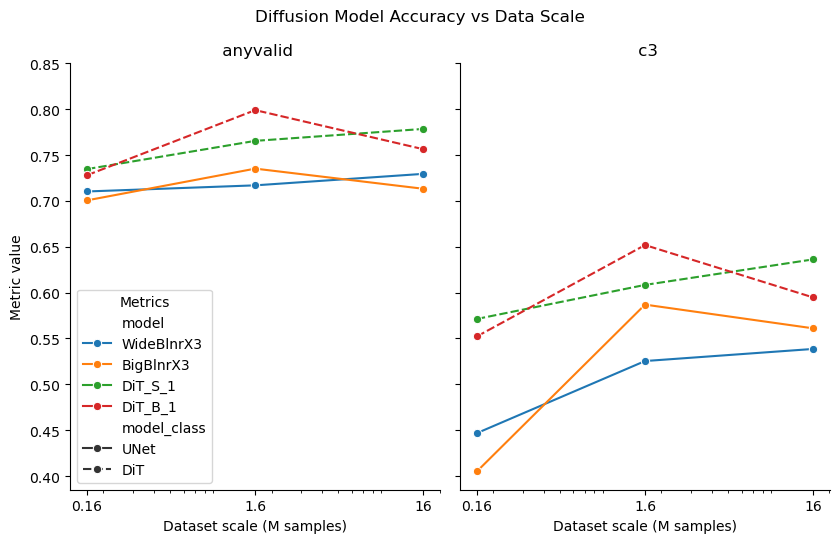

In [85]:
df_plot_diff = df_diff[df_diff["heldout"] & (df_diff["scale"].isin([0.16,1.6,16]))]
plot_data = df_plot_diff[['model', 'Rules/anyvalid', 'Rules/c3', "scale", 'model_class']]#'''r2_ratio'
# Creating the bar plot
figs, axs = plt.subplots(1, 2, figsize=(8.5, 5.5), sharey=True)
for i, metric in enumerate(["Rules/anyvalid", "Rules/c3"]):
    sns.lineplot(x='scale', y=metric, hue='model', style='model_class', 
                 data=plot_data, marker="o", ax=axs[i])
    axs[i].set_xscale('log')
    axs[i].set_title(f'{metric.replace("Rules/", " ")}')
    axs[i].set_xlabel('Dataset scale (M samples)')
    axs[i].set_ylabel('Metric value')
    axs[i].set_xticks([0.16, 1.6, 16])
    axs[i].set_xticklabels([0.16, 1.6, 16])
    #axs[i].set_ylim(0.5, 1)
    # set y tick labels true
    axs[i].set_yticks(np.arange(0.4, 0.9, 0.05))
    if i == 0:
        axs[i].legend(title='Metrics')
    else:
        axs[i].get_legend().remove()
plt.suptitle('Diffusion Model Accuracy vs Data Scale')
# Show the plot
plt.tight_layout()
saveallforms(fig_syndir, 'diffusion_model_acc_vs_datascale_lineplot')
plt.show()

In [ ]:
df_plot_diff = df_diff[df_diff["heldout"] & (df_diff["scale"].isin([0.16,1.6,16]))]
plot_data = df_plot_diff[['model', 'Rules/anyvalid', 'Rules/c3', ]]#'''r2_ratio'
# remove the row with "EDMx2*" model
plot_data = plot_data[plot_data['model'] != 'EDMx2*']
# rename column names valid -> valid row, C3 -> C3 sample
plot_data.columns = ['model', 'valid rows', 'C3 samples']
# Melting the data to long format suitable for sns.barplot
plot_data_melted = plot_data.melt(id_vars=['model'], var_name='Metric', value_name='Value')
# Creating the bar plot
plt.figure(figsize=(4, 5.5))
bar_plot = sns.barplot(x='model', y='Value', hue='Metric', data=plot_data_melted, )
                    #    order=["GPT2CmbEmb_base", "GPT2_base", "GPT2_medium", "Mamba_base", "mamba_medium", "mamba_big"])
plt.title('Autoregressive Model Comparison')
plt.xlabel('Model')
plt.ylabel('Metric value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
# Show the plot
plt.tight_layout()
# saveallforms(fig_syndir, 'autoreg_model_comparison_barplot')
plt.show()